In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Accessing and Modifying Pixel Values
You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [2]:
img = cv2.imread('Images\\car.jpg')

In [3]:
px = img[100,100]
print(px)

[148 147 143]


In [4]:
#Accessing only blue pixel
blue = img[100,100,0]
print(blue)

148


In [5]:
#Modifying pixel value
img[100,100] = [255,255,255]

In [6]:
img.shape

(477, 848, 3)

In [7]:
img.size

1213488

In [8]:
img.dtype

dtype('uint8')

### Image ROI


In [9]:
roi = img[200:300,250:350]

In [13]:
cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',img)
cv2.waitKey(0) & 0xFF == ord('q')
cv2.destroyAllWindows

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
cv2.imshow('image',roi)
cv2.waitKey(0) & 0xFF == ord('q')
cv2.destroyAllWindows

<function destroyAllWindows>

### Splitting and Merging Image Channels
The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:

In [14]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

#or 
b = img[:,:,0]

In [15]:
#Set all red pixels to 0
img[:,:,2] = 0

### Making Borders for Images (Padding)
If you want to create a border around the image, something like a photo frame, you can use cv2.copyMakeBorder() function. But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

**src** - input image<br>
**top, bottom, left, right** - border width in number of pixels in corresponding directions<br>
**borderType** - Flag defining what kind of border to be added. It can be following types:<br>
**cv2.BORDER_CONSTANT** - Adds a constant colored border. The value should be given as next argument.<br>
**cv2.BORDER_REFLECT** - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb<br>
**cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT** - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba<br>
**cv2.BORDER_REPLICATE** - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh<br>
**cv2.BORDER_WRAP** - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg<br>
**value** - Color of border if border type is cv2.BORDER_CONSTANT

In [16]:
RED = [255,0,0]
img1 = cv2.imread('Images\\opencv.png')

img1 = img1[:,:,::-1]

replicate = cv2.copyMakeBorder(img1,20,20,20,20,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,20,20,20,20,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,20,20,20,20,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,20,20,20,20,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,20,20,20,20,cv2.BORDER_CONSTANT,value=RED)

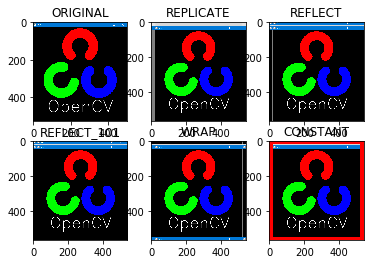

In [17]:
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()